# <font color='red'>                 Projet Machine Learning Customer Churn</font>  

In [388]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

# <font color='red'>Importer et afficher Dataset du customer churn (importer depuis Kaggle)</font>  


In [389]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#pd.set_option('display.max_rows',df.shape[0]+1)
#pd.set_option('display.max_columns',df.shape[1]+1) 
#df.dtypes
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# <font color='blue'>Les informations du dataset Customer Churn</font>  

In [390]:
df.shape

(7043, 21)

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [392]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [393]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [394]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.00,7043,7043,7043.00,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.00,7043,7043
unique,7043,2,nan,2,2,nan,2,3,3,3,...,3,3,3,3,3,2,4,nan,6531,2
top,2977-CEBSX,Male,nan,No,No,nan,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,nan,,No
freq,1,3555,nan,3641,4933,nan,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,nan,11,5174
mean,NaN,NaN,0.16,NaN,NaN,32.37,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.76,NaN,NaN
std,NaN,NaN,0.37,NaN,NaN,24.56,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.09,NaN,NaN
min,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.25,NaN,NaN
25%,NaN,NaN,0.00,NaN,NaN,9.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.50,NaN,NaN
50%,NaN,NaN,0.00,NaN,NaN,29.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.35,NaN,NaN
75%,NaN,NaN,0.00,NaN,NaN,55.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.85,NaN,NaN


In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
non_churn = df[df.Churn == 'No']
churn= df[df.Churn == 'Yes']
num_non_churn = non_churn.shape[0]
num_churn = churn.shape[0]
print( num_non_churn / (num_non_churn + num_churn) * 100 , "% des clients restent dans la sociéte.")
print( num_churn / (num_non_churn + num_churn) * 100,"% des clients quitent la sociéte.")

73.4630129206304 % des clients restent dans la sociéte.
26.536987079369588 % des clients quitent la sociéte.


# <font color='red'>Vérifier les valeurs manquantes</font>  

In [395]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# <font color='red'>Visualiser des valeurs manquantes</font>  

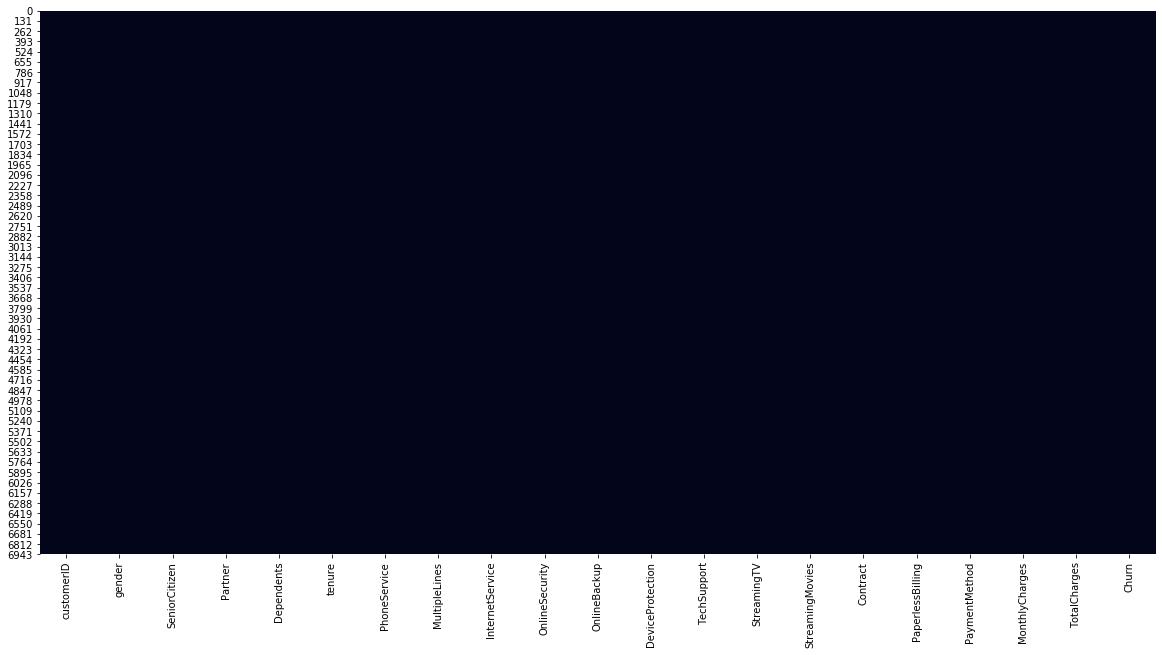

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

# <font color='green'>Visualiser de la correlation entre les variables</font> 

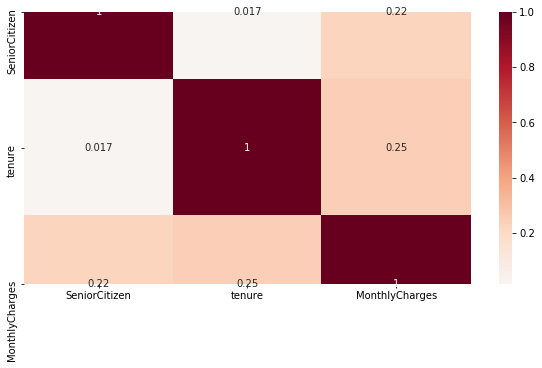

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap="RdBu_r",center=0.0, annot=True);

# <font color='green'>Visualiser le nombre de churn de clients</font>  

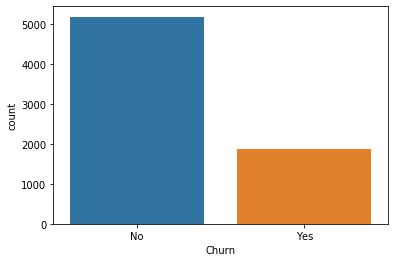

In [14]:
sns.countplot(df['Churn'])

# <font color='green'>Visualisez le taux de désabonnement pour les hommes et les femmes
</font>  


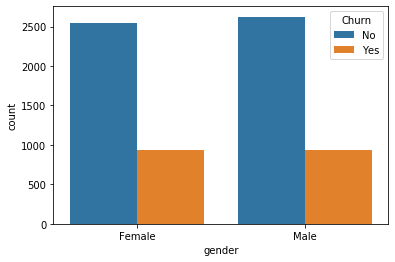

In [15]:
sns.countplot(x='gender', hue='Churn',data = df)

# <font color='green'>Visualiser le nombre de churn pour le service Internet
</font>  

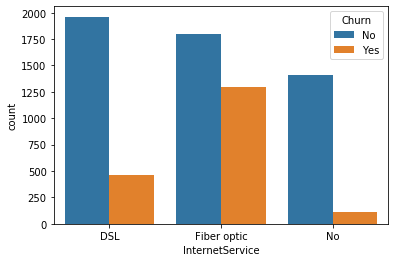

In [16]:
sns.countplot(x='InternetService', hue='Churn',data = df)

# <font color='green'>Visualiser le nombre de churn pour le Monthlycharge et tenure</font>  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB17F5CA88>,
      dtype=object)

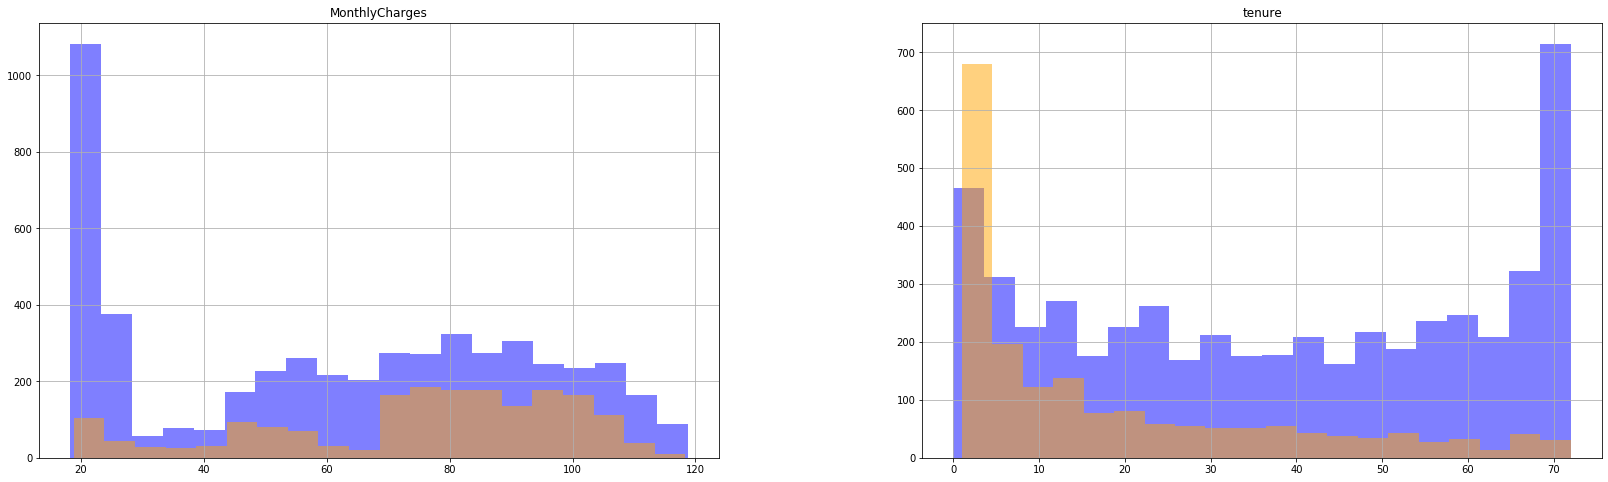

In [17]:
numerical_features = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize=(28, 8))
df[df.Churn == 'No'][numerical_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

# <font color='grey'>Supprimer les variables non utliles 'CustomerID' & 'Gender'
</font>  

In [406]:
new_df=df=df.drop('customerID',axis=1)

In [407]:
new_df=df=df.drop('gender',axis=1)


In [20]:
df.shape

(7043, 19)

# <font color='grey'>Changer le type du TotalCharges en float</font>  

In [408]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype("float")


# <font  color='blue'> Diviser la base de données en deux tableaux $X$ (tableau d'observations) et $y$ (la variable cible) </font>

In [409]:
x = df.drop('Churn', axis = 1) 
y = df['Churn']


In [23]:
print(x.shape)
print(y.shape)

(7043, 18)
(7043,)


In [24]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# <font color=orange>Encodage des variables </font>

# <font color=blue>Encodage du target(churn) avec LabelEncoder()</font>

In [410]:
y=LabelEncoder().fit_transform(y)

# <font color=blue>Encodage des autres Variables avec get_dummies() </font>

In [411]:
for column in x.columns:
    if x[column].dtype == np.object:
        continue
    x_enc=pd.get_dummies(x, drop_first=True)
#pd.set_option('display.max_rows',x.shape[0]+1)
#pd.set_option('display.max_columns',x.shape[1]+1) 
x_enc

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,1,1,1,0,1,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,1


# <font color=orange>Normalisation des variables avec MinMaxScaler </font>


In [412]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_sc=sc.fit_transform(x_enc)
X=pd.DataFrame(x_sc , columns=x_enc.columns)
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.00,0.01,0.12,0.00,1.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
1,0.00,0.47,0.39,0.22,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
2,0.00,0.03,0.35,0.01,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
3,0.00,0.62,0.24,0.21,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.03,0.52,0.02,0.00,0.00,1.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.00,0.33,0.66,0.23,1.00,1.00,1.00,0.00,1.00,0.00,...,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00
7039,0.00,1.00,0.85,0.85,1.00,1.00,1.00,0.00,1.00,1.00,...,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00
7040,0.00,0.15,0.11,0.04,1.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
7041,1.00,0.06,0.56,0.03,1.00,0.00,1.00,0.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00


In [413]:
X.isna().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet service       0
StreamingMovies_Yes             

<font color=green>On a détecté la présence du 11 valeurs manquantes dans la colonne totalcharges  comme illustrer ci dessus </font>


# <font color=red>Imputation </font>

<font color=red>Solution : remplaçons les valeurs manquantes du colonne Totalcharges par la moyenne </font>

In [414]:
X['TotalCharges'].fillna(X['TotalCharges'].mean(),inplace=True)


In [415]:
X.isna().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes                      0
Contract_On

In [32]:
print(X.shape)
print(y.shape)

(7043, 29)
(7043,)


# <font color=Red>Entrainement et evaluation d'un modèle de classification</font>


In [508]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3,stratify=y)

In [492]:
print(X_train.shape,'shape du données d entrainement')
print(X_test.shape,'shape du données de test ')


(5634, 29) shape du données d entrainement
(1409, 29) shape du données de test 


In [493]:
print(y_train.shape,'shape du données d entrainement')
print(y_test.shape,'shape du données de test ')

(5634,) shape du données d entrainement
(1409,) shape du données de test 


# Lazypredict


In [33]:
lazy = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = lazy.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 30/30 [00:32<00:00,  1.07s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.71,0.75,0.75,0.73,0.04
BernoulliNB,0.74,0.75,0.75,0.75,0.06
GaussianNB,0.68,0.73,0.73,0.70,0.06
QuadraticDiscriminantAnalysis,0.72,0.71,0.71,0.74,0.06
AdaBoostClassifier,0.81,0.71,0.71,0.80,0.64
GradientBoostingClassifier,0.80,0.71,0.71,0.79,1.81
SGDClassifier,0.78,0.70,0.70,0.78,0.11
LogisticRegression,0.79,0.70,0.70,0.78,0.10
CalibratedClassifierCV,0.79,0.70,0.70,0.78,3.52


# <font color=Red>Le premier Algorithme : KNeighborsClassifier(KNN)</font>


In [418]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Le train score est ", knn.score(X_train, y_train))
print("Le test score est ", knn.score(X_test, y_test))



Le train score est  0.9968051118210862
Le test score est  0.7217885024840313


 <font color=green>On remarque que notre modèle arrive à bien classé les gens qui ont resté et les gens qui ont quitté avec un test_score=0.72 , on remarque un overfitting </font>

# On Applique Cross Validation

In [494]:
KNN=KNeighborsClassifier(n_neighbors=1)
val_score=cross_val_score(KNN, X_train, y_train, cv=5)
val_score



array([0.72759539, 0.72670807, 0.72049689, 0.72493345, 0.73357016])

In [495]:
val_score.mean()

0.7266607932848018

# <font color=Red>selection des variables</font>

In [496]:
X.var()

SeniorCitizen                           0.14
tenure                                  0.12
MonthlyCharges                          0.09
TotalCharges                            0.07
Partner_Yes                             0.25
Dependents_Yes                          0.21
PhoneService_Yes                        0.09
MultipleLines_No phone service          0.09
MultipleLines_Yes                       0.24
InternetService_Fiber optic             0.25
InternetService_No                      0.17
OnlineSecurity_No internet service      0.17
OnlineSecurity_Yes                      0.20
OnlineBackup_No internet service        0.17
OnlineBackup_Yes                        0.23
DeviceProtection_No internet service    0.17
DeviceProtection_Yes                    0.23
TechSupport_No internet service         0.17
TechSupport_Yes                         0.21
StreamingTV_No internet service         0.17
StreamingTV_Yes                         0.24
StreamingMovies_No internet service     0.17
StreamingM

In [497]:
sel= VarianceThreshold(threshold=0.08)
sel.fit_transform(X_train)
print('Feature selection: ',sel.get_support())
print('Variable selectionnees: ', X.columns[sel.get_support()]) 
print('Variable supprimee: ', X.columns[~sel.get_support()]) 

Feature selection:  [ True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
Variable selectionnees:  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic chec

In [498]:
model= KNeighborsClassifier()
X_train=sel.fit_transform(X_train)
X_test=sel.transform(X_test)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.834043308484203
0.752306600425834


 <font color=green> on a obtenu un test_score=0.752  </font>

# <font color=Red>Matrice de confusion</font>

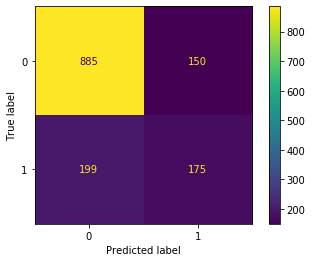

In [424]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

# <font color=Red>Rapport de classification</font>

In [425]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.816421  0.855072  0.835300      1035
           1   0.538462  0.467914  0.500715       374

    accuracy                       0.752307      1409
   macro avg   0.677441  0.661493  0.668007      1409
weighted avg   0.742640  0.752307  0.746489      1409



# <font color=blue>Réglage des Hyperparamètres</font>

# <font color=purple>RandomizedSearchCV</font>


In [524]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={'n_neighbors':np.arange(1,31),'p':np.arange(1,10),'algorithm':['auto','ball_tree','kd_tree','brute'],'weights':['uniform','distance'],'metric':['minkowski']}
search=RandomizedSearchCV(model,param_distributions=param_grid,n_iter=10,cv=5,random_state=1)
search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'metric': ['minkowski'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'p': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'weights': ['uniform', 'distance']},
                   random_state=1)

In [525]:
search.best_params_

{'weights': 'uniform',
 'p': 4,
 'n_neighbors': 24,
 'metric': 'minkowski',
 'algorithm': 'ball_tree'}

In [526]:
final_modelknn=KNeighborsClassifier(n_neighbors=24,p=4,algorithm='ball_tree',weights='uniform',metric='minkowski')

In [527]:
final_modelknn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=24, p=4)

In [528]:
print(final_modelknn.score(X_train,y_train))
print(final_modelknn.score(X_test,y_test))

0.8077742279020235
0.7799858055358411


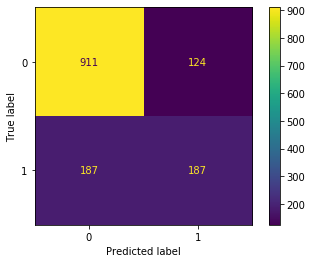

In [431]:
plot_confusion_matrix(final_model, X_test, y_test)
plt.show()

In [432]:
y_pred =final_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.829690  0.880193  0.854196      1035
           1   0.601286  0.500000  0.545985       374

    accuracy                       0.779276      1409
   macro avg   0.715488  0.690097  0.700091      1409
weighted avg   0.769064  0.779276  0.772386      1409



# <font color=green> Le deuxième algorithme : Arbres de décision</font>

In [433]:
from sklearn.tree import DecisionTreeClassifier

In [434]:
dt = DecisionTreeClassifier(random_state=0)

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3,stratify=y)

In [436]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [437]:
print(X_train.shape,'shape du données d entrainement')
print(X_test.shape,'shape du données de test ')


(5634, 29) shape du données d entrainement
(1409, 29) shape du données de test 


In [358]:
print(y_train.shape,'shape du données d entrainement')
print(y_test.shape,'shape du données de test ')

(5634,) shape du données d entrainement
(1409,) shape du données de test 


In [438]:
print('Le train_score=', dt.score(X_train, y_train))
print('Le test_score=', dt.score(X_test, y_test))

Le train_score= 0.9971600993965212
Le test_score= 0.7430801987224982


 <font color=green> on a obtenu test_score=0.743 avec un score d'entrainnement=0.99</font>

# <font color=orange>Matrice de Confusion</font>


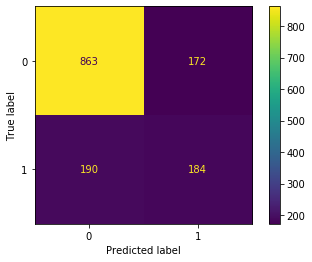

In [360]:
from sklearn.metrics import plot_confusion_matrix
y_pred = dt.predict(X_test)
plot_confusion_matrix(dt, X_test, y_test)
plt.show()

# <font color=orange>Rapport de classification </font>


In [361]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.819563  0.833816  0.826628      1035
           1   0.516854  0.491979  0.504110       374

    accuracy                       0.743080      1409
   macro avg   0.668209  0.662898  0.665369      1409
weighted avg   0.739213  0.743080  0.741020      1409



# <font color=green>L'importance des variables</font>


In [362]:
dt.feature_importances_

array([2.24685657e-02, 2.06544461e-01, 1.87345205e-01, 2.06870859e-01,
       2.22644620e-02, 1.95512875e-02, 0.00000000e+00, 2.82763883e-03,
       1.54142929e-02, 1.13458166e-01, 1.00525613e-02, 8.76254766e-04,
       1.54969482e-02, 0.00000000e+00, 1.76315620e-02, 1.52996864e-04,
       1.90104965e-02, 0.00000000e+00, 1.41266281e-02, 0.00000000e+00,
       1.31498007e-02, 0.00000000e+00, 1.48720312e-02, 1.63214686e-02,
       8.72181410e-03, 2.16633294e-02, 1.24865761e-02, 2.54185782e-02,
       1.32740164e-02])

#  <font color=blue>Traçage de l'arbre de decision  </font>


In [363]:
names=X.columns
names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [62]:
classe=['No','Yes']

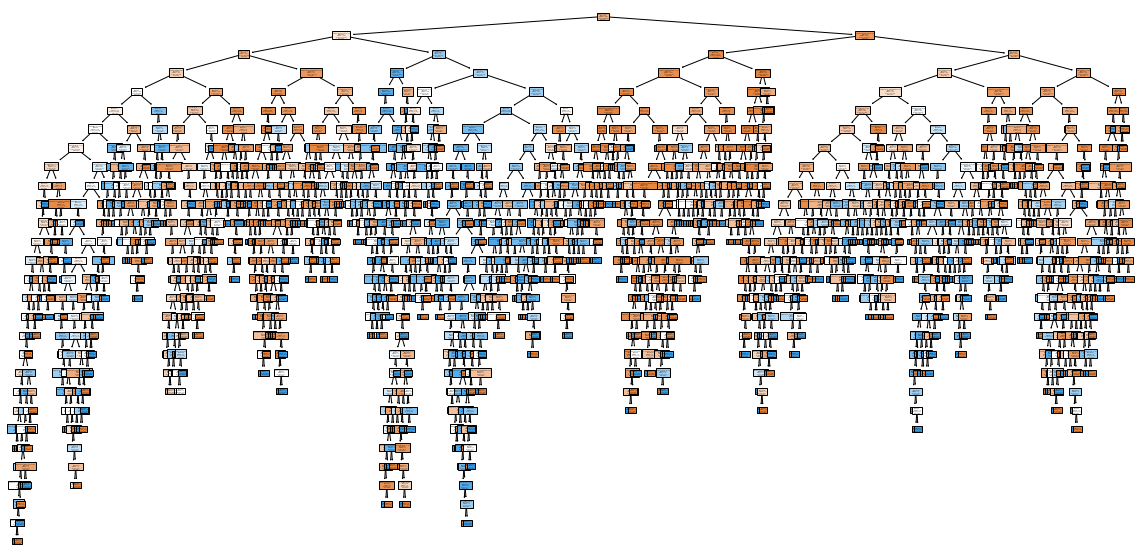

In [64]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=names, class_names=classe ,filled=True )
plt.show()

<font color=red> 
L'arbre est trop long et difficile à interpreter. Pour faire face à ce problème on va essayer de régler les hyperparamètres de notre modèle. </font>

# <font color=blue>Réglage des Hyperparamètres</font>


# <font color=purple>GridSearchCV</font>


In [439]:
DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,10)}

In [440]:
from sklearn.model_selection import GridSearchCV
grid =GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=param_grid, cv=5 )


In [441]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [442]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [443]:
final_modeltree = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=2)

In [444]:
final_modeltree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [445]:
print('Le train_score=', final_modeltree.score(X_train, y_train))
print('Le test_score=', final_modeltree.score(X_test, y_test))

Le train_score= 0.7926872559460418
Le test_score= 0.7821149751596878


# <font color=orange>Matrice de Confusion</font>


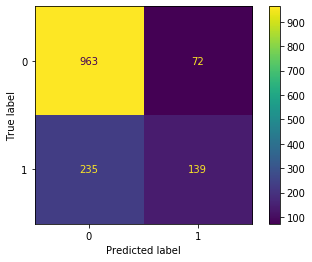

In [353]:
plot_confusion_matrix(final_modeltree, X_test, y_test)
plt.show()

# <font color=Red>Rapport de classification</font>

In [371]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.819563  0.833816  0.826628      1035
           1   0.516854  0.491979  0.504110       374

    accuracy                       0.743080      1409
   macro avg   0.668209  0.662898  0.665369      1409
weighted avg   0.739213  0.743080  0.741020      1409



# <font color=blue>Traçage de l'arbre de decision avec le final_model</font>

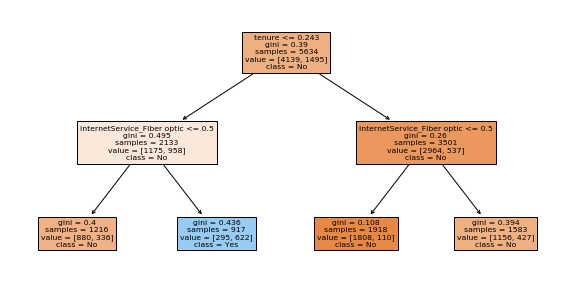

In [80]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(final_modeltree, feature_names=names, class_names=classe ,filled=True)
plt.show()

# <font color=Red>Le troisième  Algorithme : Regression Logistique</font>


In [446]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3,stratify=y)

In [448]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [449]:
print(X_train.shape,'shape du données d entrainement')
print(X_test.shape,'shape du données de test ')

(4930, 29) shape du données d entrainement
(2113, 29) shape du données de test 


In [310]:
print(y_train.shape,'shape du données d entrainement')
print(y_test.shape,'shape du données de test ')

(4930,) shape du données d entrainement
(2113,) shape du données de test 


In [450]:
print('Le train_score=',logreg.score(X_train, y_train))
print('Le test_score=', logreg.score(X_test, y_test))


Le train_score= 0.8040567951318458
Le test_score= 0.7979176526265973


 <font color=green> on a obtenu un test_score=0.797 avec un score d'entrainement = 0.804 </font>

# <font color=orange>Matrice de Confusion</font>


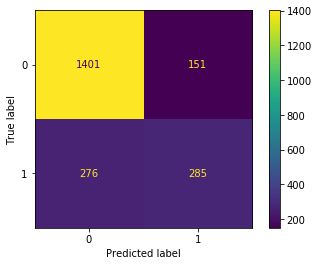

In [312]:
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

# <font color=Red>Rapport de classification</font>

In [313]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.835420  0.902706  0.867761      1552
           1   0.653670  0.508021  0.571715       561

    accuracy                       0.797918      2113
   macro avg   0.744545  0.705364  0.719738      2113
weighted avg   0.787166  0.797918  0.789161      2113



# <font color=blue>Réglage des Hyperparamètres</font>


# <font color=purple>RandomizedSearchCV</font>


In [451]:
param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'max_iter': [100,1000, 2000, 3000]}
          
           
search=RandomizedSearchCV(LogisticRegression(),param_distributions=param_grid,n_iter=10,cv=5,random_state=1)
search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 1000, 2000, 3000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none']},
                   random_state=1)

In [452]:
search.best_params_

{'penalty': 'none', 'max_iter': 100}

In [453]:
final_modelreg=LogisticRegression(penalty='none', max_iter=100)

In [454]:
final_modelreg.fit(X_train,y_train)

LogisticRegression(penalty='none')

In [455]:
print('Le train_score=',final_modelreg.score(X_train,y_train))
print('Le test_score=',final_modelreg.score(X_test,y_test))

Le train_score= 0.8089249492900609
Le test_score= 0.8002839564600095


 <font color=green> on a obtenu un test_score=0.800 avec un score d'entrainement = 0.808 , on remarque une petite augmenation dans le test score aprés le réglage  </font>

 # <font color=orange>Matrice de Confusion & Rapport de classification</font>


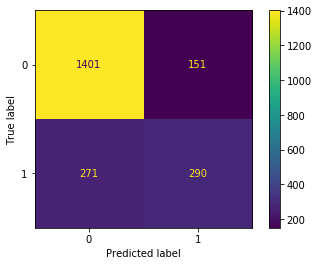

In [456]:
plot_confusion_matrix(final_modelreg, X_test, y_test)
plt.show()

In [457]:
y_pred = final_modelreg.predict(X_test)
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.837919  0.902706  0.869107      1552
           1   0.657596  0.516934  0.578842       561

    accuracy                       0.800284      2113
   macro avg   0.747758  0.709820  0.723975      2113
weighted avg   0.790043  0.800284  0.792042      2113



#  <font color=Red>Le Quatriéme  Algorithme :XGBOOST</font>

In [323]:
from xgboost import XGBClassifier                         
import xgboost as xgb

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3,stratify=y)

In [459]:
model_xgb=XGBClassifier()
model_xgb.fit(X_train, y_train)

print('Le train_score=',model_xgb.score(X_train,y_train))
print('Le test_score=',model_xgb.score(X_test,y_test))

[00:15:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Le train_score= 0.9354411207875805
Le test_score= 0.7864849517319704


# <font color=blue>Réglage des Hyperparamètres</font>

# <font color=purple>RandomizedSearchCV</font>


In [460]:
model_xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>

In [461]:
from sklearn.model_selection import RandomizedSearchCV

param_test1 = {
 'max_depth':[4,5,6],
  'min_child_weight':[6,8,10,12],
     'gamma':[i/10.0 for i in range(0,5)],
   'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)],
     'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
search_boost=RandomizedSearchCV(XGBClassifier(),param_distributions=param_test1,n_iter=10,cv=5,random_state=1)
search_boost.fit(X_train,y_train)

[00:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:15:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:15:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [462]:
search_boost.best_params_

{'subsample': 0.8,
 'reg_alpha': 0,
 'min_child_weight': 8,
 'max_depth': 4,
 'gamma': 0.1,
 'colsample_bytree': 0.8}

In [463]:
final_modelboost=XGBClassifier(learning_rate=0.01, subsample= 0.8, gamma= 0.1,colsample_bytree= 0.8)

In [464]:
final_modelboost.fit(X_train,y_train)

[00:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [465]:
print('Le train_score=',final_modelboost.score(X_train,y_train))
print('Le test_score=',final_modelboost.score(X_test,y_test))

Le train_score= 0.8260128739113972
Le test_score= 0.7995457126632595


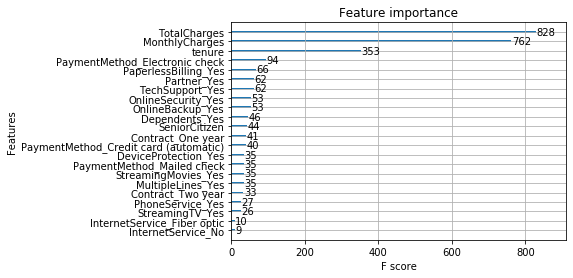

In [466]:
xgb.plot_importance(model_xgb)

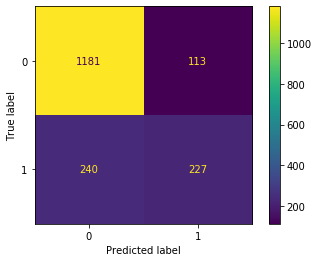

In [467]:
plot_confusion_matrix(final_modelboost, X_test, y_test)
plt.show()

In [468]:
y_pred = final_modelboost.predict(X_test)
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.831105  0.912674  0.869982      1294
           1   0.667647  0.486081  0.562577       467

    accuracy                       0.799546      1761
   macro avg   0.749376  0.699378  0.716280      1761
weighted avg   0.787757  0.799546  0.788461      1761



#  <font color=Red>Le Cinquième   Algorithme :SVM (Support Vector Machine)</font>


In [469]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3,stratify=y)

In [470]:
from sklearn.svm import SVC # support vector classifier
svclassifier = SVC(probability=True)
svclassifier.fit(X_train, y_train)


SVC(probability=True)

In [471]:
print('Le score d entrainement',svclassifier.score(X_train,y_train))
print('Le test score',svclassifier.score(X_test,y_test))

Le score d entrainement 0.812570995834911
Le test score 0.7932992617830777


In [472]:
y_pred = svclassifier.predict(X_test)

#  <font color=orange>Matrice de Confusion & Rapport de classification</font>


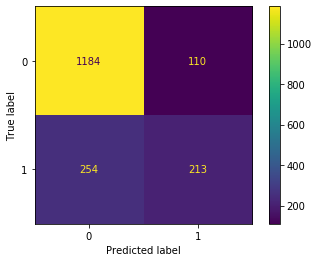

In [473]:
plot_confusion_matrix(svclassifier, X_test, y_test)
plt.show()

In [474]:
y_pred = svclassifier.predict(X_test)
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.823366  0.914992  0.866764      1294
           1   0.659443  0.456103  0.539241       467

    accuracy                       0.793299      1761
   macro avg   0.741404  0.685548  0.703002      1761
weighted avg   0.779895  0.793299  0.779908      1761



# <font color=blue>Réglage des Hyperparamètres</font>


# <font color=purple>RandomizedSearchCV</font>


In [475]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear','rbf', 'poly', 'sigmoid']
            } 

search_svc=RandomizedSearchCV(SVC(),param_distributions=param_grid,n_iter=5,cv=5,random_state=1)


In [476]:
search_svc.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=1)

In [477]:
search_svc.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}

In [478]:
final_modelsvc=SVC(kernel='rbf',C=1000,gamma=0.001,probability=True)

In [479]:
final_modelsvc.fit(X_train,y_train)

SVC(C=1000, gamma=0.001, probability=True)

In [264]:
print('le score d entrainement ',final_modelsvc.score(X_train,y_train))
print('le test score',final_modelsvc.score(X_test,y_test))

le score d entrainement  0.8032942067398713
le test score 0.7967064168086314


#  <font color=orange>Matrice de Confusion & Rapport de classification</font>


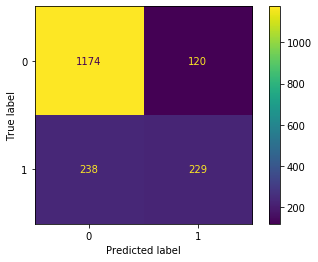

In [337]:
plot_confusion_matrix(final_modelsvc, X_test, y_test)
plt.show()

In [266]:
y_pred = final_modelsvc.predict(X_test)
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.831445  0.907264  0.867701      1294
           1   0.656160  0.490364  0.561275       467

    accuracy                       0.796706      1761
   macro avg   0.743803  0.698814  0.714488      1761
weighted avg   0.784961  0.796706  0.786440      1761



#  <font color=Crimson>Comparaison entre les Trois algorithmes  (KNN , Arbre de decision , regression logistique)</font>

In [480]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [532]:
y_scoresreg = final_modelreg.predict_proba(X_test)
y_scoresknn = final_modelknn.predict_proba(X_test)

y_scoresdt = final_modeltree.predict_proba(X_test)
y_scoresxgboost = final_modelboost.predict_proba(X_test)
y_scoressvc = final_modelsvc.predict_proba(X_test)

fpr, tpr,thresholds= roc_curve(y_test, y_scoresreg[:, 1])  
fpr1,tpr1 , thresholds= roc_curve(y_test, y_scoresknn[:, 1])
fpr2,tpr2 , thresholds= roc_curve(y_test, y_scoresdt[:, 1])
fpr3,tpr3 , thresholds= roc_curve(y_test, y_scoresxgboost[:, 1])
fpr4,tpr4 , thresholds= roc_curve(y_test, y_scoressvc[:, 1])
roc_auc = auc(fpr, tpr)

#  <font color=LimeGreen>Traçage Courbe roc</font>

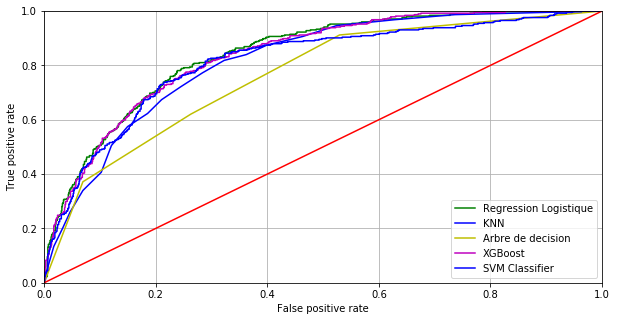

In [533]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr ,'g' ,label='Regression Logistique')
plt.plot(fpr1 , tpr1, 'b' ,label='KNN')
plt.plot(fpr2,tpr2,'y' ,label='Arbre de decision')
plt.plot(fpr3,tpr3, 'm',label='XGBoost')
plt.plot(fpr4,tpr4, 'b',label='SVM Classifier')
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [386]:
auc(fpr, tpr) #regression

0.8418817329303263

In [534]:
auc(fpr1, tpr1) #knn

0.816724792683872

In [190]:
auc(fpr2, tpr2) #arbre de decision

0.7628213077062183

In [188]:
auc(fpr3, tpr3) #xgboost

0.8375778242785914

In [189]:
auc(fpr4, tpr4) #svc

0.8132230230695704